R-squared: 0.7581793426302125
Feature Importances:
             Feature    Importance
5          smoker_no  11784.779801
6         smoker_yes  11784.779801
7   region_northeast    877.911242
2           children    450.111304
9   region_southeast    443.137737
1                bmi    366.948572
10  region_southwest    276.168635
0                age    249.585615
8   region_northwest    158.604871
3         sex_female     73.344480
4           sex_male     73.344480
RMSE: 5926.612729226093, MAPE: 0.46953694956856096


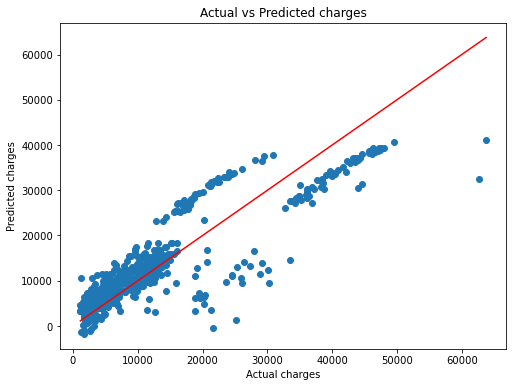

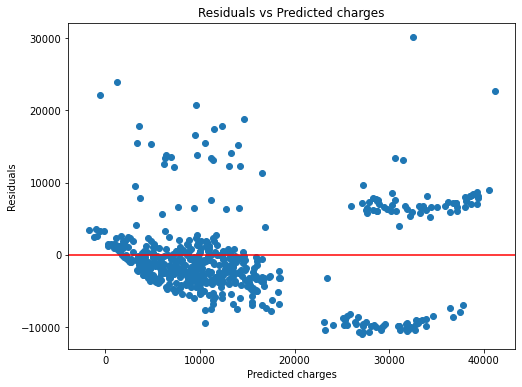

Time taken:  0.4526076316833496 seconds


In [144]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import time

# Start the timer
start_time = time.time()

# Read the data
#data = #pd.read_csv("C:/Users/ROEYE/Downloads/insurance.csv")
data = pd.read_csv("https://raw.githubusercontent.com/RoliAr/IR-files/main/insurance.csv")

# One-hot encoding
data = pd.get_dummies(data, columns=["sex", "smoker", "region"])

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.4, random_state=123)

# Separate the features from the target
train_features = train.drop(columns="charges")
train_target = train["charges"]

test_features = test.drop(columns="charges")
test_target = test["charges"]
##################################Regression################################################################################
# Perform linear regression
model = LinearRegression()
model.fit(train_features, train_target)

# Model summary
print(f"R-squared: {r2_score(test_target, model.predict(test_features))}")

# Get the feature names from train_features after one-hot encoding
feature_names = train_features.columns

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)

# Predict the charges on the test data and evaluate the model
predictions = model.predict(test_features)

# Compute errors
errors = test_target - predictions

# Compute RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_target, predictions))
mape = np.mean(np.abs(errors/test_target))

# Print results
print(f"RMSE: {rmse}, MAPE: {mape}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(test_target, predictions)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual vs Predicted charges')

# Plotting the line for perfect prediction
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], color='red')
plt.show()

# Residuals vs Predicted values
residuals = test_target - predictions

plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals)
plt.xlabel('Predicted charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted charges')
plt.axhline(0, color='red') # adding a horizontal line at y=0 for reference
plt.show()

# Print the time taken
end_time = time.time()
print("Time taken: ", end_time - start_time, "seconds")


Decision Tree - RMSE: 6977.875733886624, MAPE: 0.46750971565621735


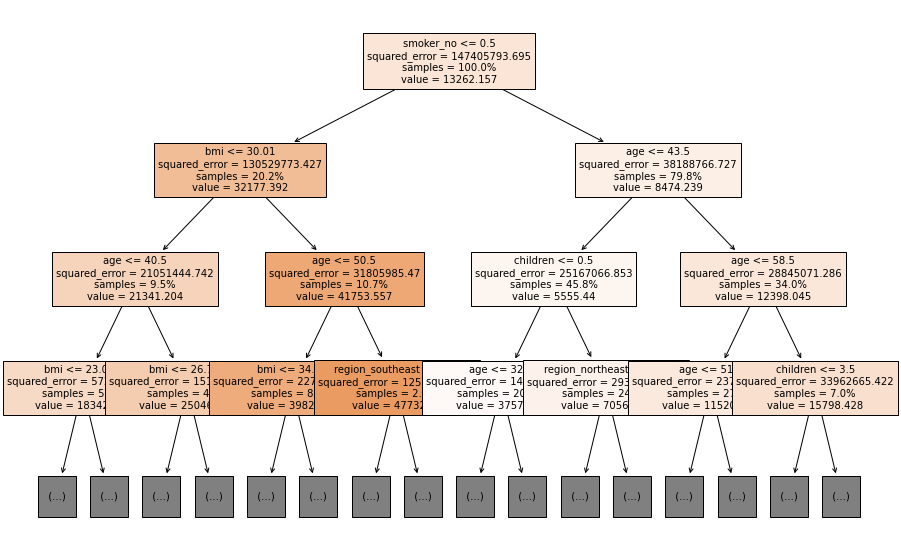

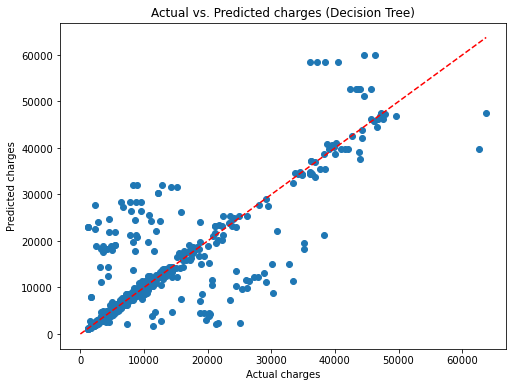

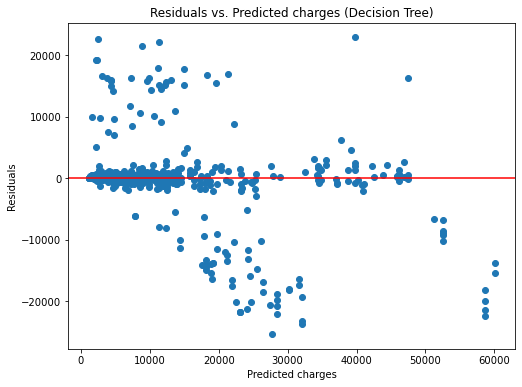

Elapsed time: 2.0767245292663574 seconds


In [140]:
# Import necessary libraries dECISION tREE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import time

# Start the timer
start_time = time.time()

# Read the data
data = pd.read_csv("https://raw.githubusercontent.com/RoliAr/IR-files/main/insurance.csv")

# One-hot encoding
data = pd.get_dummies(data, columns=["sex", "smoker", "region"])

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.4, random_state=123)

# Separate the features from the target
train_features = train.drop(columns="charges")
train_target = train["charges"]

test_features = test.drop(columns="charges")
test_target = test["charges"]

# Perform decision tree regression
model_tree = DecisionTreeRegressor(random_state=123)
model_tree.fit(train_features, train_target)

# Predict the charges on the test data and evaluate the model
predictions_tree = model_tree.predict(test_features)

# Compute errors
errors_tree = test_target - predictions_tree

# Compute RMSE and MAPE for decision tree
rmse_tree = np.sqrt(mean_squared_error(test_target, predictions_tree))
mape_tree = np.mean(np.abs(errors_tree / test_target))

# Print results
print(f"Decision Tree - RMSE: {rmse_tree}, MAPE: {mape_tree}")

# Plot the tree with percentage samples
plt.figure(figsize=(15, 10))
plot_tree(model_tree, max_depth=3, filled=True, feature_names=train_features.columns, fontsize=10, proportion=True)
plt.show()

# Plot actual vs. predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(test_target, predictions_tree)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual vs. Predicted charges (Decision Tree)')
plt.plot([0, np.max(test_target)], [0, np.max(test_target)], color='red', linestyle='--')  # Adding diagonal reference line
plt.show()

# Plot residuals vs. predicted charges
plt.figure(figsize=(8, 6))
plt.scatter(predictions_tree, errors_tree)
plt.xlabel('Predicted charges')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted charges (Decision Tree)')
plt.axhline(0, color='red')  # Adding a horizontal line at y=0 for reference
plt.show()

# Calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

[0.13300157 0.20228876 0.02491439 0.00390063 0.0035118  0.34195981
 0.27092393 0.00659368 0.00445551 0.00427182 0.0041781 ]
Random Forest - RMSE: 4726.773736525167, MAPE: 0.374004896537109


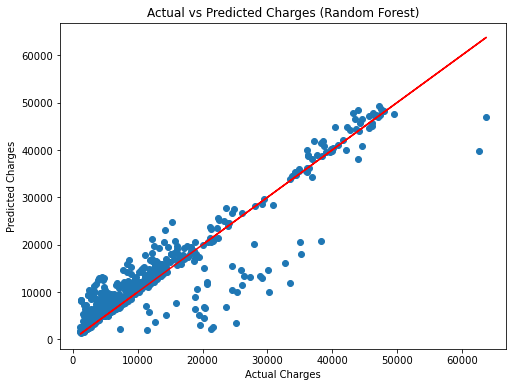

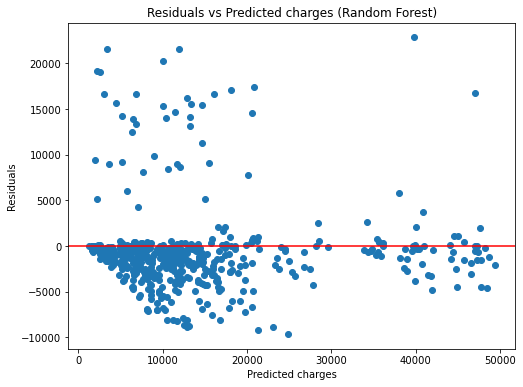

Elapsed time: 1.3513622283935547 seconds


In [139]:
# Random Forest- Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

# Perform random forest regression
model_rf = RandomForestRegressor(n_estimators=500, random_state=123)
model_rf.fit(train_features, train_target)

# print summary of model
print(model_rf.feature_importances_)

# Predict the charges on the test data and evaluate the model
predictions_rf = model_rf.predict(test_features)

# Compute errors
errors_rf = test_target - predictions_rf

# Compute RMSE and MAPE for random forest
rmse_rf = np.sqrt(mean_squared_error(test_target, predictions_rf))
mape_rf = np.mean(np.abs(errors_rf/test_target))

# Print results
print(f"Random Forest - RMSE: {rmse_rf}, MAPE: {mape_rf}")

# Calculate residuals
residuals_rf = test_target - predictions_rf


# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(test_target, predictions_rf)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Random Forest)')

# Adding a diagonal line (y=x) for reference
plt.plot(test_target, test_target, color='red')

plt.show()
# Residuals vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predictions_rf, residuals_rf)
plt.xlabel('Predicted charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted charges (Random Forest)')
plt.axhline(0, color='red') # adding a horizontal line at y=0 for reference
plt.show()

# Calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

17/17 [==============================] - 0s 2ms/step
Neural Network Model - RMSE: 4638.266070553809
Neural Network Model - MAPE: 0.2732268635214086


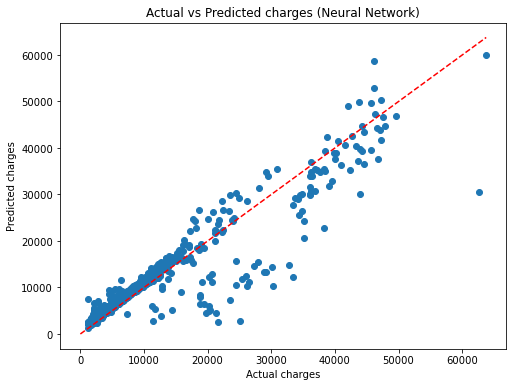

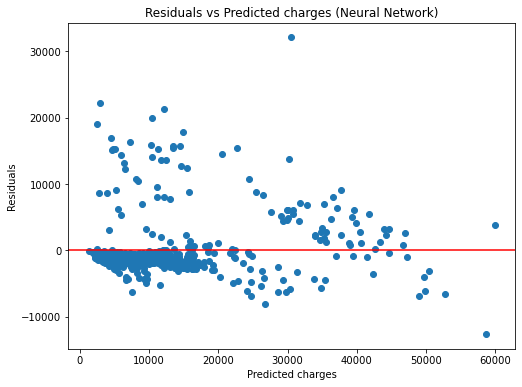

Elapsed time: 52.688082456588745 seconds


In [132]:
#Neural Network
import tensorflow as tf
# Get the feature names
feature_names = train_features.columns

# Convert features and target to arrays
train_features_array = train_features.values
train_target_array = train_target.values
test_features_array = test_features.values

# Start the timer
start_time = time.time()


# Define the neural network architecture
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(train_features_array.shape[1],), name="input_layer"),
    tf.keras.layers.Dense(32, activation="relu", name="hidden_layer1"),
    tf.keras.layers.Dense(16, activation="relu", name="hidden_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Compile the model
model_nn.compile(optimizer="adam", loss="mean_squared_error")

# Print model summary
#model_nn.summary()

# Train the model
model_nn.fit(train_features_array, train_target_array, epochs=1000, verbose=0)

# Evaluate the model
predictions = model_nn.predict(test_features_array).flatten()

# Compute the errors
errors = test_target - predictions

# Compute RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test_target, predictions))
mape = np.mean(np.abs(errors / test_target))

# Print evaluation metrics
print("Neural Network Model - RMSE:", rmse)
print("Neural Network Model - MAPE:", mape)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(test_target, predictions)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted charges (Neural Network)")
plt.plot([0, np.max(test_target)], [0, np.max(test_target)], color="red", linestyle="--")  # Adding diagonal reference line
plt.show()

# Plot residuals vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(predictions, errors)
plt.xlabel("Predicted charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted charges (Neural Network)")
plt.axhline(0, color="red")  # Adding a horizontal line at y=0 for reference
plt.show()

# Calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
